# Import Library 

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


import os
import cv2

# Constant 

In [6]:
BATCH_SIZE = 32  # Number of samples per batch during training
IMAGE_SIZE = 256  # Size of the images (height and width)
CHANNELS = 3  # Number of color channels in the images 
EPOCHS = 50  # Number of training epochs

# 2. Remove the uselless images

In [7]:
data_dir = 'My_data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image My_data\angry\-background-annoyed-angry-young-woman-mad-spam-message-stuck-phone-137947771.jpg
Issue with image My_data\angry\-white-shirt-jacket-angry-expression-face-turn-red-background-gary-123610164.jpg
Issue with image My_data\angry\.ipynb_checkpoints
Issue with image My_data\angry\0.jpg
Issue with image My_data\angry\00-t-shirt-space-marines-pics-of-mad-faces-smiley-video-game-warhammer-40000.png
Issue with image My_data\angry\02.jpg
Issue with image My_data\angry\02f618a6-90b9-4181-89d9-040c368dfe2b-AFP_AFP_1A01GG.jpg
Issue with image My_data\angry\08westSub-videoSixteenByNine3000.jpg
Issue with image My_data\angry\0ad6faa1202f107e1edceed7744420d2.jpg
Issue with image My_data\angry\1-5sfP-HpSvIu8E44i2dBHw.jpeg
Issue with image My_data\angry\1000_F_199133055_FN9ZwUzdlNGVxrvfH03ExH7OUoQ5ke7p.jpg
Issue with image My_data\angry\1000_F_211702532_awO2Jq8IFhiyveWEKGxy4LGPBNmPUImu.jpg
Issue with image My_data\angry\1000_F_228016677_YoY1Xadgtwpsxu5HBKjY5ZPIjpEoRRQp.jpg
I

KeyboardInterrupt: 

In [10]:
os.listdir(data_dir)

['angry', 'fear', 'Happy', 'sad', 'surprise']

In [11]:
image1= cv2.imread(os.path.join('My_data','angry' ,'0.jpg' ))
image2= cv2.imread(os.path.join('My_data','angry' ,'02.jpg' ))

In [12]:
print(f'the shape of image 1 :{image1.shape}')
print(f'the shape of image 1 :{image2.shape}')

the shape of image 1 :(245, 326, 3)
the shape of image 1 :(298, 438, 3)


**As we can see her we a have different data shape** 

# 3. Load Data

Object `image_dataset_from_directory` not found.


In [14]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "My_data",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2482 files belonging to 5 classes.


In [15]:
class_names = dataset.class_names
class_names

['Happy', 'angry', 'fear', 'sad', 'surprise']

In [16]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[2 1 3 1 4 1 3 1 0 1 2 4 3 3 0 4 3 2 4 1 0 1 3 3 4 3 3 1 3 3 0 0]


<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[115.74219  , 131.74219  , 147.74219  ],
        [113.34375  , 129.34375  , 145.34375  ],
        [116.484375 , 131.48438  , 150.48438  ],
        ...,
        [109.       , 120.       , 140.       ],
        [108.       , 119.       , 139.       ],
        [108.       , 119.       , 139.       ]],

       [[113.10156  , 129.10156  , 145.10156  ],
        [105.609375 , 121.609375 , 137.60938  ],
        [113.67969  , 128.67969  , 147.67969  ],
        ...,
        [108.       , 119.       , 139.       ],
        [108.       , 119.       , 139.       ],
        [107.       , 118.       , 138.       ]],

       [[114.41406  , 130.41406  , 146.41406  ],
        [110.72656  , 126.72656  , 142.72656  ],
        [117.57031  , 133.57031  , 149.57031  ],
        ...,
        [110.       , 121.       , 141.       ],
        [107.42969  , 118.42969  , 138.42969  ],
        [108.       , 119.       , 139.       ]],

       ...,

     

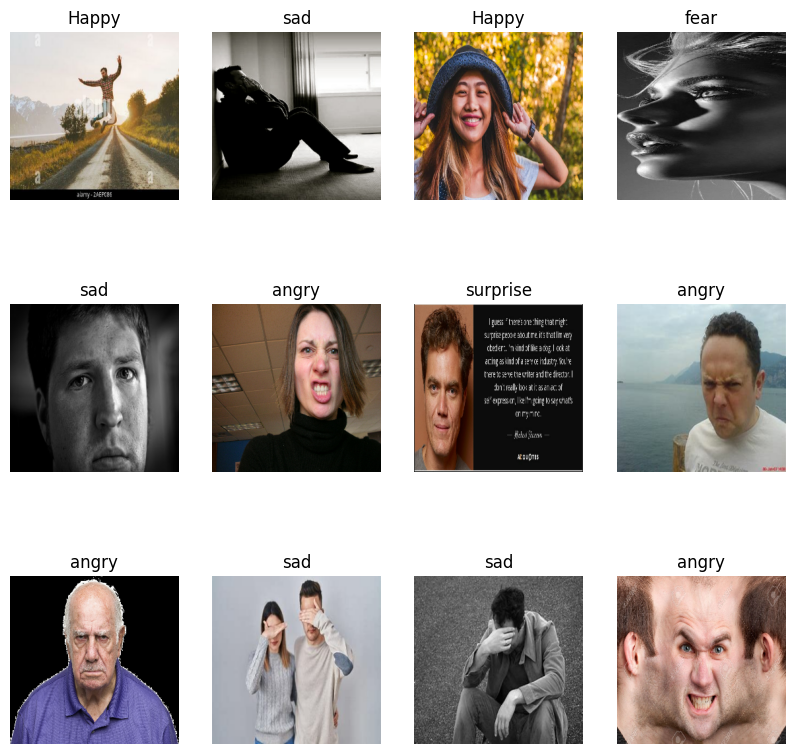

In [95]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# 4. Split the data into training and validation & testing sets

In [19]:
train_size = int(len(dataset)*.7) # 70 %
val_size = int(len(dataset)*.2) # 20% 
test_size = int(len(dataset)*.1) # 10 %

In [20]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

In [98]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [99]:
train_ds = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# 5. Scale Data

In [100]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# 6. Augmented the data 

In [101]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [102]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# 7. Build the model 

## 7.1 Create the Sequential Model 

In [103]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [104]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
   
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 66s 1s/step - loss: 1.5832 - accuracy: 0.2500 - val_loss: 1.5712 - val_accuracy: 0.2917
Epoch 2/50
54/54 [==============================] - 55s 1s/step - loss: 1.5443 - accuracy: 0.2882 - val_loss: 1.4592 - val_accuracy: 0.3646
Epoch 3/50
54/54 [==============================] - 53s 980ms/step - loss: 1.4954 - accuracy: 0.3275 - val_loss: 1.4255 - val_accuracy: 0.3583
Epoch 4/50
54/54 [==============================] - 55s 1s/step - loss: 1.4606 - accuracy: 0.3681 - val_loss: 1.4132 - val_accuracy: 0.4271
Epoch 5/50
54/54 [==============================] - 57s 1s/step - loss: 1.4661 - accuracy: 0.3594 - val_loss: 1.4316 - val_accuracy: 0.3917
Epoch 6/50
54/54 [==============================] - 60s 1s/step - loss: 1.4485 - accuracy: 0.3738 - val_loss: 1.3789 - val_accuracy: 0.4104
Epoch 7/50
54/54 [==============================] - 64s 1s/step - loss: 1.4322 - accuracy: 0.3779 - val_loss: 1.3670 - val_accuracy: 0.4271
Epoch 8/50
54/54 

## 7.2 Add the ResNet50 

In [108]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [109]:

resnet_model.summary()

resnet_model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
     

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               1049088   
                                                                 
 dense_12 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [110]:
epochs=10
history2 = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
54/54 [==============================] - 145s 3s/step - loss: 1.5864 - accuracy: 0.4508 - val_loss: 1.1888 - val_accuracy: 0.5208
Epoch 2/10
54/54 [==============================] - 150s 3s/step - loss: 1.0128 - accuracy: 0.6105 - val_loss: 1.1744 - val_accuracy: 0.5604
Epoch 3/10
54/54 [==============================] - 139s 3s/step - loss: 0.9042 - accuracy: 0.6481 - val_loss: 1.1288 - val_accuracy: 0.5729
Epoch 4/10
54/54 [==============================] - 136s 3s/step - loss: 0.8040 - accuracy: 0.6881 - val_loss: 1.0019 - val_accuracy: 0.6271
Epoch 5/10
54/54 [==============================] - 138s 3s/step - loss: 0.7564 - accuracy: 0.7078 - val_loss: 0.9215 - val_accuracy: 0.6500
Epoch 6/10
54/54 [==============================] - 137s 3s/step - loss: 0.6796 - accuracy: 0.7431 - val_loss: 0.9369 - val_accuracy: 0.6687
Epoch 7/10
54/54 [==============================] - 136s 3s/step - loss: 0.6092 - accuracy: 0.7760 - val_loss: 0.9455 - val_accuracy: 0.6792
Epoch 8/10
54

In [105]:
Final_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(model)

ValueError: All layers added to a Sequential model should have unique names. Name "resnet50" is already the name of a layer in this model. Update the `name` argument to pass a unique name.

# 8 Evaluate the model 

In [85]:
scores1 = resnet_model.evaluate(test_ds)

7/7 [==============================] - 12s 2s/step - loss: 1.1339 - accuracy: 0.6295


In [86]:
scores2 = model.evaluate(test_ds)

ValueError: in user code:

    File "C:\AI\Deep_Learning\ImageClassification\imageclassification\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "C:\AI\Deep_Learning\ImageClassification\imageclassification\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\AI\Deep_Learning\ImageClassification\imageclassification\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "C:\AI\Deep_Learning\ImageClassification\imageclassification\lib\site-packages\keras\engine\training.py", line 1790, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\AI\Deep_Learning\ImageClassification\imageclassification\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\AI\Deep_Learning\ImageClassification\imageclassification\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\AI\Deep_Learning\ImageClassification\imageclassification\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\AI\Deep_Learning\ImageClassification\imageclassification\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\AI\Deep_Learning\ImageClassification\imageclassification\lib\site-packages\keras\losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\AI\Deep_Learning\ImageClassification\imageclassification\lib\site-packages\keras\backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 5) vs (None, 1)).


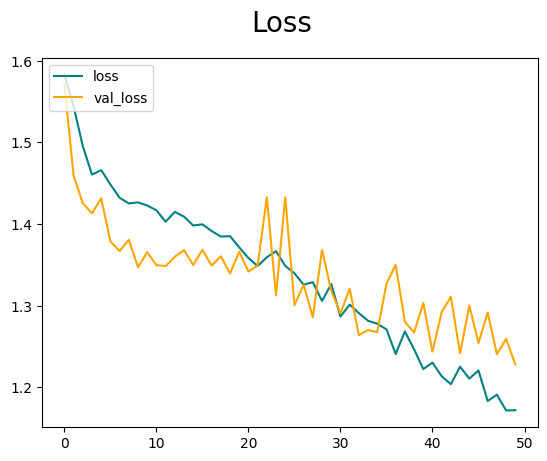

In [43]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


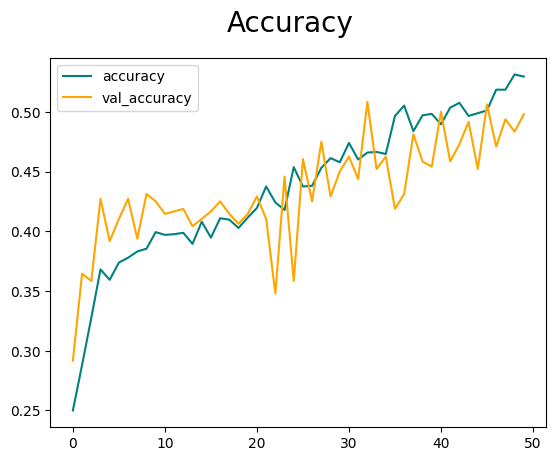

In [45]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## When we add the ResNet50

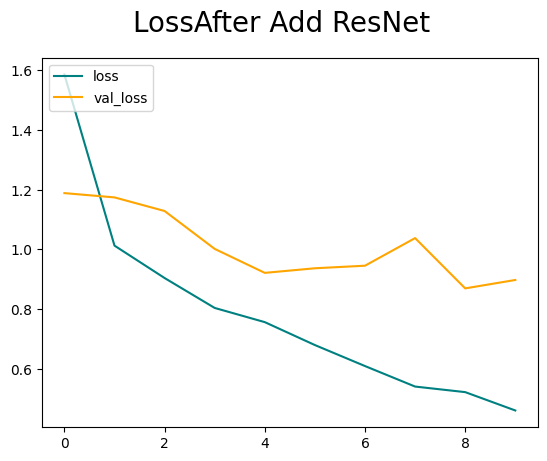

In [113]:
fig = plt.figure()
plt.plot(history2.history['loss'], color='teal', label='loss')
plt.plot(history2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('LossAfter Add ResNet', fontsize=20)
plt.legend(loc="upper left")



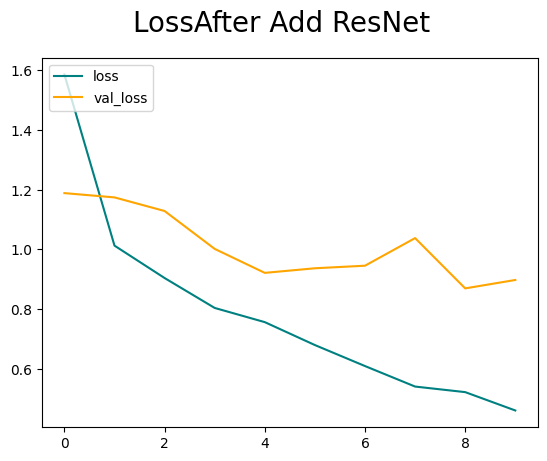

In [112]:
fig = plt.figure()
plt.plot(history2.history['loss'], color='teal', label='loss')
plt.plot(history2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('LossAfter Add ResNet', fontsize=20)
plt.legend(loc="upper left")
plt.show()


# 9 Test the model 

## 9.1 Test Random images

In [106]:
import cv2
import numpy as np

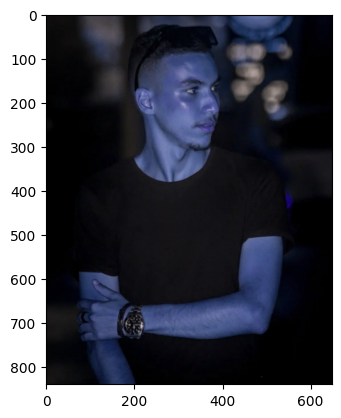

In [120]:
img = cv2.imread('Our_real_test/image1.png')
plt.imshow(img)
plt.show()

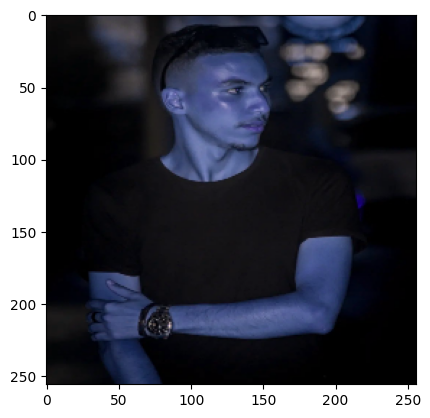

In [121]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [123]:
yhat = resnet_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 117ms/step


In [124]:
yhat

array([[1.8954471e-06, 9.9533135e-01, 1.7652902e-03, 2.6965609e-03,
        2.0494241e-04]], dtype=float32)

In [132]:
my_test_presection =class_names[np.argmax(yhat[0])]

'angry'

## 9.2 Test of our test set

In [53]:
dataset.class_names

['Happy', 'angry', 'fear', 'sad', 'surprise']

In [56]:
classes =['Happy', 'angry', 'fear', 'sad', 'surprise']


first image to predict
actual label: sad
1/1 [==============================] - 2s 2s/step
predicted label: sad


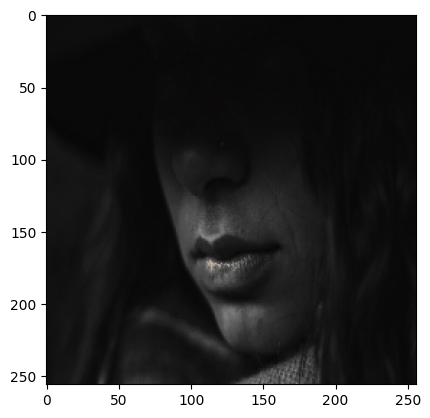

In [129]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = resnet_model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

### Test Model 2

In [130]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 110ms/step


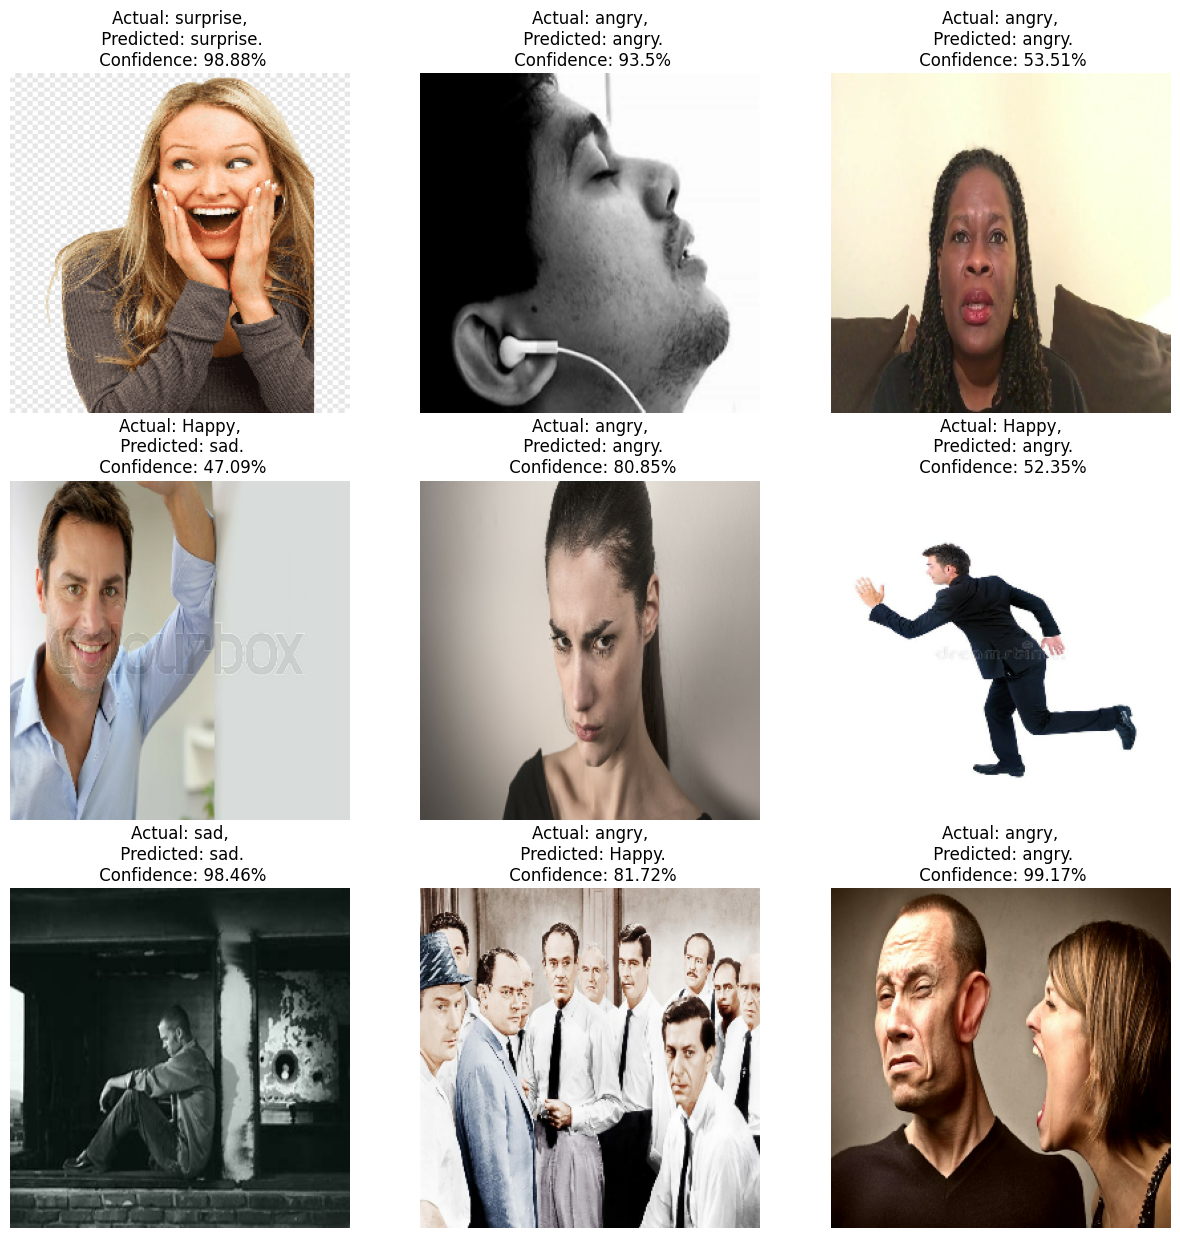

In [131]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(resnet_model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

7/7 [==============================] - 12s 2s/step - loss: 1.0613 - accuracy: 0.6652


# 10. Save the models 

## 10.1 Model 1

In [70]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


In [72]:
model.save("model1.h5")




## 10.1 Model 1

In [119]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/2\assets


INFO:tensorflow:Assets written to: models/2\assets


In [118]:
model.save("Ourmodel_withRESNET50.h5")
